# <center> Hernquist distribution with a central black hole

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import os
import scipy
from tqdm import tqdm

In [2]:
#np.random.seed(2) #fixing seed to produce the same initial condition at every run, for reproducibility purpouse

The Hernquist potential-density pair can approximate well elliptic galaxies.
<br>
It is described by the following density profile
$$\rho(r) = \frac{M_g}{2\pi}\frac{a}{r}\frac{1}{(r+a)^3}$$
<br>
where $M_g$ is the total mass of the particles composing the galaxy system and $a$ is a scale length.
<br>
This model has a central density cusp with strength $\rho\propto r^{-1}$ and, in the outer parts, has a density decrease with $\rho\propto r^{-4}$. 
<br>
We can write the cumulative mass distribution computing the following integral
$$M(r) = \int_0^r4\pi r'^2 \rho(r')dr'$$
that yields
$$M(r)=M_g\frac{r^2}{(r+a)^2}$$
We can compute the potential using
$$\phi(r) = -4\pi G \left[\frac{1}{r}\int_0^r\rho(r')r'^2dr'+\int_r^{\infty}\rho(r')r'dr'\right]=-G\frac{M_g}{r+a}$$
where $G$ is the gravitational constant.

We initialize a system with $N=10^4$ particles for a total mass of $M_g=1$. 
<br>
The scale length is fixed at $a=10$.

In [3]:
N     =  3*10**4
M_g   =  1
a     =  10

Then, the mass of every single particle is given by $\frac{M_g}{N}$

In [4]:
m     =  np.ones(N)*M_g/N
print(m[0])

3.3333333333333335e-05


Now, we add a central black hole whose mass is 

In [5]:
M_bh  =  574440227.4744718/10**10.5
mu    =  M_bh/M_g

So, now the total potential of the Hernquist distribution with the central black hole is described by
$$\phi(r) = -G\frac{M_g}{r+a} - G\frac{\mu M_g}{r}$$
with
$$\mu = \frac{M_{bh}}{M_g}$$

## <center> Functions

Here we define functions that will be used through the notebook.

In [6]:
# Compute the density of an Hernquist distribution
def density_H (M_g, a, r):
    return (M_g/(2*np.pi))*(a/(r*(r+a)**(3)))

In [7]:
N     =  3*10**4
M_g   =  1
a     =  10
M_bh  =  574440227.4744718/10**10.5
mu    =  M_bh/M_g

r         = np.linspace(0.02,10**6,N)

In [8]:
# Compute the potential of an Hernquist distribution + bh
def Phi (M_g, a, r, mu):
    return - M_g/(r+a) - mu*M_g/r

In [9]:
#Function to compute the integral to get the number of particles
def integral (r, a, M_g):
    return M_g*r**2/(r+a)**2

In [10]:
# Function to get the number of particles inside each shell (at a fixed time)
def number_particles(raggi, r):
    num_part = []
    for i in range(len(raggi)-1):
        left  = raggi[i]
        right = raggi[i+1]
        provv = len([el for el in r if (left<el<right)])
        num_part.append(provv)
    return num_part

## <center>  Initial positions sampling

We use the direct Monte-Carlo method to sample the position of the $N=10^4$ particles according to the Hernquist density distribution.
<br>
Since the Hernquist distribution is spherically symmetric, we will use spherical coordinates: $r$, $\varphi$ and $\theta$
<br>
First, we write the normalized probability density function (pdf) for the three coordinates and, integrating them, we obtain the cumulative density functions (cdf). 

$$
pdf = 
\begin{cases}
    p(r) dr= \frac{2ar}{(r+a)^3} dr \\
    p(\varphi)d\varphi = \frac{1}{2\pi} d\varphi\\
    p(\theta)d\theta = \frac{1}{2}sin\theta d\theta
\end{cases}
$$
<br>
$$
cdf = 
\begin{cases}
    P(r) = \frac{r^2}{(r+a)^2} \\
    P(\varphi) = \frac{\varphi}{2\pi} \\
    P(\theta) = \frac{1}{2}(1-cos\theta)
\end{cases}
$$

Inverting the equation for the mass, we obtain 
$$
r = \frac{a}{\sqrt{\frac{M_g}{M(r)}}-1} = \frac{a}{\sqrt{\frac{1}{cdf}}-1}
$$
with
$$
cdf = \frac{M(r)}{M_g}
$$

In [11]:
# Radius
cdf       = np.random.uniform(0,1,N)
r         = a/((1/cdf)**(0.5)-1)

# Phi
phi       = np.random.uniform(0,2*np.pi,N)

# Theta
arc_theta = np.random.uniform(0,1,N)
theta     = np.asarray([math.acos(1-2*arc_theta[i]) for i in range(N)])

We can compared our sampling with the theoretical distribution of the coordinates. 

In [12]:
# Theorical distributions
bins      = 100

r_th      = np.geomspace(0.8,max(r),bins)
theta_th  = np.linspace(0,np.pi,bins)
phi_th    = np.linspace(0,2*np.pi,bins)

p_r       = 2*a*r_th/(r_th+a)**3
p_theta   = (np.sin(theta_th))/2
p_phi     = np.full(len(phi_th),1/(2*np.pi))

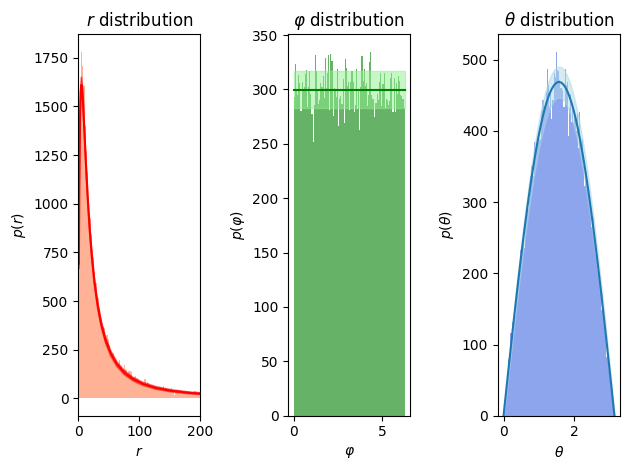

In [13]:
# Distribution of the three parameters in histograms

fig, ax = plt.subplots(1,3, tight_layout=True) 

# r
counts_r, bins_edges_r , __r              = ax[0].hist(r, bins = bins, color = 'coral', density=False, alpha=.6, lw=0, range=(0,200))
area_r = np.sum(counts_r*np.diff(bins_edges_r))

ax[0].plot(r_th,p_r*area_r, color = 'red')
ax[0].set(xlim=(0,200), title = fr'$r$ distribution', xlabel = r'$r$', ylabel=r'$p(r)$') 

# phi
counts_phi, bins_edges_phi , __phi        = ax[1].hist(phi, bins = bins, color = 'green', density=False, alpha=.6, lw=0)
area_phi = np.sum(counts_phi*np.diff(bins_edges_phi))

ax[1].plot(phi_th,p_phi*area_phi, color = 'green')
ax[1].set(title = fr'$\varphi$ distribution', xlabel = r'$\varphi$', ylabel=r'$p(\varphi)$')

# theta
counts_theta, bins_edges_theta , __theta  = ax[2].hist(theta, bins = bins, color = 'royalblue', density=False, alpha=.6, lw=0)
area_theta = np.sum(counts_theta*np.diff(bins_edges_theta))

ax[2].plot(theta_th,p_theta*area_theta)
ax[2].set(title = fr'$\theta$ distribution', xlabel = r'$\theta$', ylabel=r'$p(\theta)$')


# Poissonian errors
err_r     = np.sqrt(p_r*area_r)
err_theta = np.sqrt(p_theta*area_theta)
err_phi   = np.sqrt(p_phi*area_phi)


ax[0].fill_between(r_th, p_r*area_r-err_r, p_r*area_r+err_r, alpha=0.5, color='red')
ax[1].fill_between(phi_th, p_phi*area_phi-err_phi, p_phi*area_phi+err_phi, alpha=0.5, color='lightgreen')
ax[2].fill_between(theta_th, p_theta*area_theta-err_theta, p_theta*area_theta+err_theta, alpha=0.5, color='lightblue')

plt.show()

To simulate the evolution of the system we will use a tree code that takes as input parameters positions in cartesian coordinates. Hence, we have to convert the coordinates of the initial positions from spherical to cartesian.

In [14]:
r_sort = np.sort(r)
r_sort = r_sort[::-1]

In [15]:
X = r_sort*np.sin(theta)*np.cos(phi)
Y = r_sort*np.sin(theta)*np.sin(phi)
Z = r_sort*np.cos(theta)

We can also compute the initial center of mass of the distribution

In [16]:
# Compute the initial center of mass
cm_x = np.sum(X)/N
cm_y = np.sum(Y)/N
cm_z = np.sum(Z)/N

print('The initial center of mass is in: (', cm_x, ', ', cm_y, ', ', cm_z, ').')

The initial center of mass is in: ( 452.6064138622523 ,  369.16862562627097 ,  -535.5176254765936 ).


We can see that it is not centered at zero; most probably because of some sampled external particles that skew the position of the center of mass.

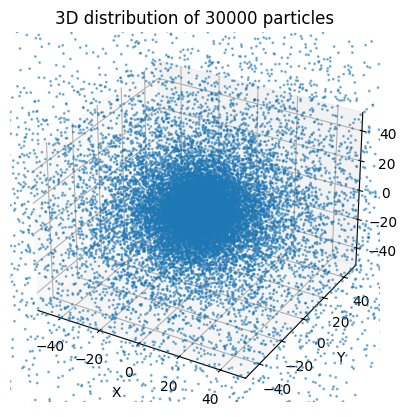

In [17]:
fig = plt.figure()

ax = fig.add_subplot(projection='3d')
ax.scatter3D(X, Y, Z, s=1, alpha=0.5, label='particles')

#ax.set(xlim=(-1000,1000), ylim = (-1000,1000), zlim = (-1000,1000))
ax.set(xlim=(-50,50), ylim = (-50,50), zlim = (-50,50))
ax.set(title = fr'3D distribution of {N} particles', xlabel = r'X', ylabel = r'Y', zlabel = r'Z')

plt.show()

### <center>  See if sample is right

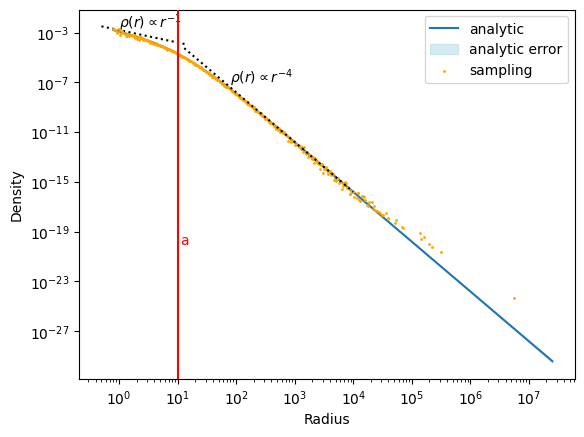

In [18]:
# Compute the volume of spherical shells until the maximun radius sampled of the distribution
raggi   = np.geomspace(0.8,max(r),500)
delta_V = np.array([4*np.pi*raggi[i+1]**3/3 - 4*np.pi*raggi[i]**3/3 for i in range(len(raggi)-1)])

# Compute the density profile of the sampled distribution
# using  #particles*particle_mass/volume_step
density = (number_particles(raggi,r)/delta_V)*m[0]

#Error on the number of particles of the simulation. Taken as the square root of the number of particles inside a shell.
error_N = np.sqrt(number_particles(raggi,r))
#Propagation of the error to the density
error_d = error_N * m[0] / delta_V



# Analytic distribution
rho     =  density_H(M_g, a, raggi)

# p_integrale is the average number of particles in each shell predicted by the analytical solution
p_integrale = np.array([integral(raggi[i+1],a, M_g) - integral(raggi[i],a, M_g) for i in range(len(raggi)-1)])

#We take 1 sigma as the error. Being Poissonian is the square root of the number of particles
error_p = np.sqrt(p_integrale)

#Error propagation on the density
error_d_t = error_p * m[0] / delta_V


#PLOTS

# Analytic solution
plt.plot(raggi[:-1],rho[:-1], label='analytic', zorder=10)
plt.fill_between(raggi[:-1], rho[:-1]-error_d_t, rho[:-1]+error_d_t, alpha=0.5, color='lightblue', label='analytic error')

# Sampling
#plt.plot(raggi[:-1], density, zorder=1)
plt.scatter(raggi[:-1], density, zorder=50, color='orange', s=1, label='sampling')
#plt.fill_between(raggi[:-1], density-error_d, density+error_d, alpha=0.5, color = 'orange', label='sampling error')
plt.axvline(a, zorder=50, color='red')
plt.plot([0.5, 15], [1/0.5/200/np.pi, 1/15/200/np.pi], color='black', linestyle='dotted')
plt.plot([13, 10**4], [1/13**4*a/2/np.pi, 1/10**16*a/2/np.pi], zorder=500, color='black', linestyle='dotted')

plt.text(a+1, 10**(-20), 'a', color='red')
plt.text(1, 0.0025, r'$\rho(r)\propto r^{-1}$', color='black')
plt.text(80, 10**(-7), r'$\rho(r)\propto r^{-4}$', color='black')

plt.xlabel('Radius')
plt.ylabel('Density')
plt.loglog()
plt.legend()
plt.show()

## <center>  Distribution function

To sample the initial velocity distribution, we need to compute the distribution function $f(\varepsilon)$, starting from the potential and using the Eddington formula:
$$
    f(\varepsilon)=\frac{1}{\sqrt{8}\pi^2}\frac{d}{d\varepsilon}\int_0^\varepsilon\frac{d\rho}{d\psi}\frac{d\psi'}{\sqrt{\psi'-\varepsilon}}
$$
Where $\psi$ is the relative potential, 
$$
\psi(r) = -\phi(r) = G \left(\frac{M_g}{r+a} + \frac{\mu M_g}{r}\right)
$$
$\rho$ is the density distribution of the Hernquist potential
$$
\rho(r) = \frac{M_g}{2\pi}\frac{a}{r}\frac{1}{(r+a)^3}
$$
and the energy $\varepsilon$ is

$$
\varepsilon = \psi(r) - \frac{v^2}{2}
$$

that runs between $0$ and the maximum value of the potential (that is given by the value of the relative potential at the centre of the distribution). 


The integral of the distribution function can be derived analytically when the energy $\epsilon$ is large; so in the proximity of the black hole.
In their article "A family of models for spherical stellar systems", S.Tremaine et al. derived it obtaining:
$$
f_{\eta}(\epsilon)=\frac{\eta\Gamma(4-\eta)}{2^{7/2}\pi^{5/2}\mu^{3-\eta}\Gamma(\frac{5}{2}-\eta)}\epsilon^{3/2-\eta}
$$
with $\eta=2$ for the Hernquist distribution.

Unfortunately, to sample the velocities we need to know the distribution function for all the energies.
<br>
What we can do, it is to compute the integral numerically.

For now, let's focus on the integrad
$$
g(\epsilon) \equiv \int_0^\varepsilon\frac{d\rho}{d\psi}\frac{d\psi'}{\sqrt{\psi'-\varepsilon}}
$$

In [19]:
import time
start = time.time()

alpha = 0.999999

integral = np.zeros(N)

#r_sort = np.sort(r)
#r_sort = r_sort[::-1]

eps_integral = -Phi(M_g,a,r_sort,mu) #define the extreme of integration of each particle according to its radius (max value = psi)

N_points = 100

for i in range(N):

    r_ = np.linspace(r_sort[0]+1.1,r_sort[i],N_points)
    
    psi = -Phi(M_g, a, r_, mu)
    rho = density_H(M_g, a, r_)

    drho_dpsi = np.gradient(rho)/np.gradient(psi)
    
    integral[i]  = np.trapz(drho_dpsi/(np.sqrt(eps_integral[i] - alpha*psi)),psi)
end = time.time()
print(end-start)

2.1305530071258545


Text(0.5, 1.0, 'Numerical integral')

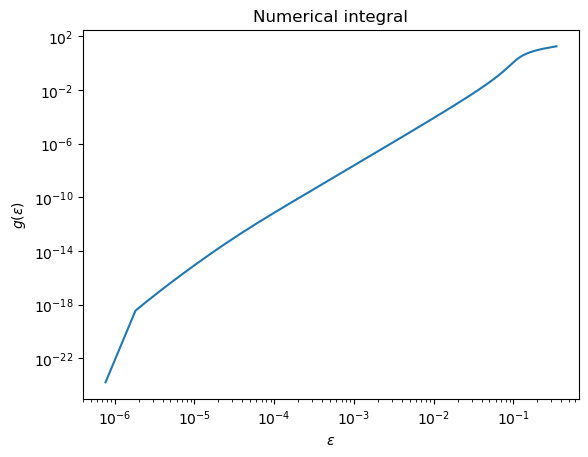

In [19]:
# plot g(e)
plt.plot(eps_integral,integral)
plt.loglog()
plt.xlabel(r'$\varepsilon$')
plt.ylabel(r'$g(\epsilon)$')

plt.title('Numerical integral')

Once we have $g(\varepsilon)$, we derive it by $\varepsilon$ and multiply the result for $\frac{1}{\sqrt{8}\pi^2}$ to obtain the distribution function $f(\varepsilon)$, according to the Eddington formula.

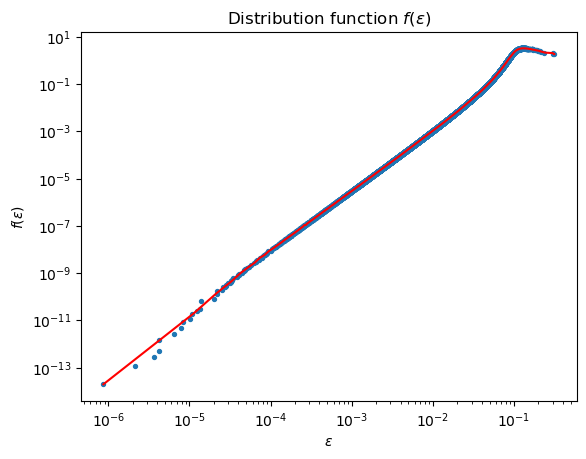

In [33]:
f_eps = np.gradient(integral,1)/np.gradient(eps_integral,1)/(np.sqrt(8)*np.pi**2) 


f_eps_interpolate = scipy.interpolate.interp1d(eps_integral, f_eps, kind='linear')
eps_grid = np.linspace(min(eps_integral), max(eps_integral), N)

plt.plot(eps_grid,f_eps_interpolate(eps_grid), color='red', label='interpolation')
plt.scatter(eps_integral,f_eps, label ='data points', s=8)
plt.xlabel(r'$\varepsilon$')
plt.ylabel(r'$f(\varepsilon)$')

#plt.legend()
plt.title(r'Distribution function $f(\epsilon)$')
plt.loglog()
plt.savefig('distribution_function.png')

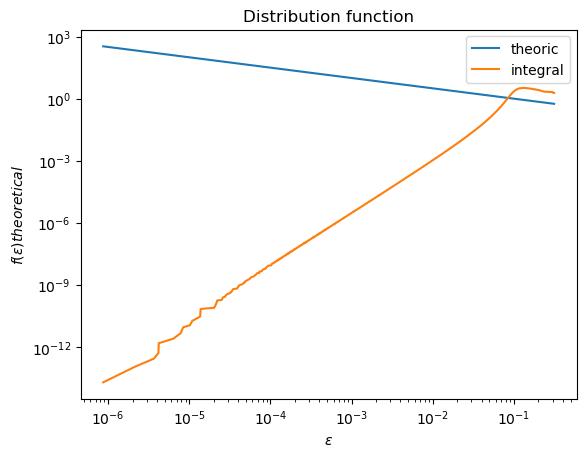

In [34]:
# Comparison with the theoric distribution

eta = 2

epsilon_ = np.geomspace(min(psi),max(psi),N)
#epsilon_ = np.linspace(0,max(psi),N)

def DF_th (eta, epsi, mu):
    
    return (eta*math.gamma(4-eta)*epsi**((1.5)-eta))/(2**(3.5)*np.pi**(2.5)*mu**(3-eta)*math.gamma((2.5)-eta))

f_eps_th = DF_th(eta, epsilon_, mu)

plt.plot(epsilon_, f_eps_th, label='theoric')
#plt.scatter(epsilon_, f_eps_th)
plt.plot(eps_integral,f_eps, label='integral')
plt.xlabel(r'$\varepsilon$')
plt.ylabel(r'$f(\varepsilon) theoretical$')

plt.title('Distribution function')
plt.loglog()
plt.legend()

## <center> Velocities sampling

Once we have numerically sampled the distribution function, we can determine the velocity distribution numerically.

To do this, we need to integrate the distribution function over the velocity space

$$
F(\varepsilon) = \int f(\varepsilon)d^3v
$$

but under the assumption of isotropic distribution of velocities, the integral becomes

$$
F(\varepsilon) = 4\pi \int_0^v f(\varepsilon) v^2 dv
$$

From the definition of $\varepsilon = \psi - \frac{v^2}{2}$, we can write

$$
v= \sqrt{2(\psi - \varepsilon)}
$$ 

So the integral becomes

$$
F(\varepsilon) = 4 \pi \int_0^{\psi} d\varepsilon  f(\varepsilon) \sqrt{2(\psi - \varepsilon)}
$$

Again, we can  compute this integral numerically.
<br>
Similarly to what we have done for the distribution function, we build an array of $\psi$ over which evaluate the integral. 

Once we have computed numerically the integral for $F(\varepsilon)$ we can think to invert it to get the velocity distribution. The first step to achieve this goal is to normalize the integral:

$$ F_{norm}(\varepsilon) = \frac{F(\varepsilon)}{max(F)}$$

In this way this $ F_{norm}(\varepsilon)$ is a quantity within $(0,1)$. As already discussed, $\varepsilon = \psi - \frac{v^2}{2}$ and therefore the sampling of the velocity distribution is not strightforward, since for each radius $\varepsilon$ runs from $0$ to $\psi(r)$. 

The idea is then to sample the values of $F(\varepsilon)$ from a uniform distribution, and find which is the value of $\varepsilon$ that minimizes the distance between the integral computed and the sampled value. In this way we have fixed both $\psi$ and $\varepsilon$ and we are able to extract the velocity distribution.

In [23]:
velocity = np.empty(N)

N_steps_1 = 100

psi_F = - Phi(M_g, a, r_sort, mu)

F_eps = np.zeros(N)

for j in tqdm(range(N)):

    #define the value of psi at a given radius
    epsilon_F = np.linspace(min(eps_integral),psi_F[j], N_steps_1)
    
    deps = psi_F[j] / N_steps_1
    
    integral_F = np.empty(N_steps_1)
    
    f_eps_F  = f_eps_interpolate(epsilon_F)
    
    for i in range(N_steps_1):
        integral_F[i] = np.trapz(4*np.pi*np.sqrt(2*(psi_F[j]-epsilon_F[epsilon_F<=epsilon_F[i]]))*f_eps_F[epsilon_F<=epsilon_F[i]], epsilon_F[epsilon_F<=epsilon_F[i]])
   
    #for each psi we interpolate the integral
    inv_interp_F = scipy.interpolate.interp1d(integral_F, epsilon_F,kind='linear')
    
    F_guess = np.random.uniform(min(integral_F), max(integral_F))
    #F_guess = np.random.uniform(0,1)

    eps_try = inv_interp_F(F_guess)

    velocity[j] = np.sqrt(2*(psi_F[j] - eps_try)) 
    
    F_eps += integral_F[-1]

100%|████████████████████████████████████████████████████████████████████████████| 30000/30000 [01:41<00:00, 294.68it/s]


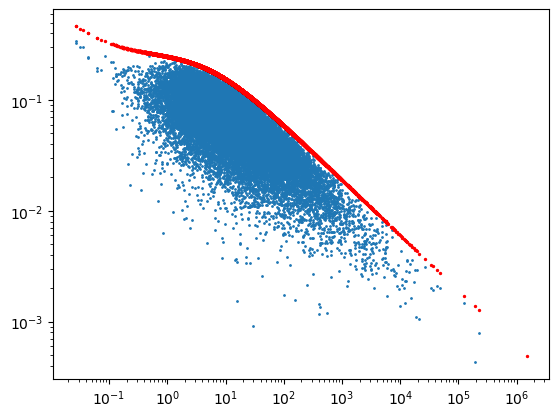

In [24]:
plt.scatter(r_sort, velocity, s= 1)
plt.scatter(r_sort, np.sqrt(-2*Phi (M_g, a, r_sort, mu)), s= 2, c= 'r')
plt.loglog()
plt.show()

In [25]:
#np.savetxt("r_sort_exam_1.txt", r_sort)
#np.savetxt("velocity_exam_1.txt", velocity)

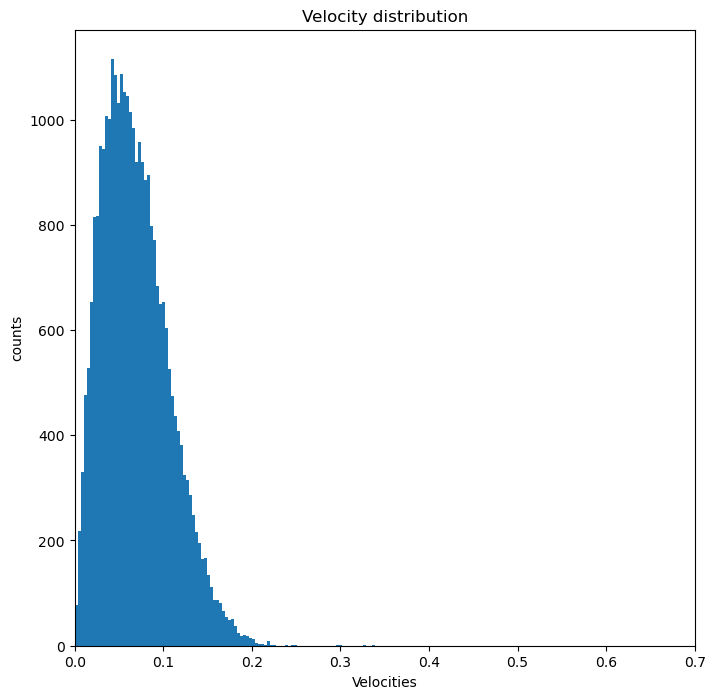

In [26]:
fig = plt.figure(figsize=(8,8))

plt.hist(velocity,bins=100)
plt.title('Velocity distribution')
plt.xlabel('Velocities')
plt.ylabel('counts')
plt.xlim(0,0.7)
plt.show()

## <center> Simulation

In [29]:
P_theta = np.random.uniform(0,1,N) 
theta_v = np.arccos(1-2*P_theta)
phi_v = np.random.uniform(0,2*np.pi,N)

v_x = velocity * np.sin(theta_v) * np.cos(phi_v)
v_y = velocity * np.sin(theta_v) * np.sin(phi_v)
v_z = velocity * np.cos(theta_v)


# initialization of the central BH:
m = np.insert(m,0,M_bh)
X = np.insert(X,0,0)
Y = np.insert(Y,0,0)
Z = np.insert(Z,0,0)
v_x = np.insert(v_x,0,0)
v_y = np.insert(v_y,0,0)
v_z = np.insert(v_z,0,0)

In [32]:
np.savetxt('masses.txt', m)
np.savetxt('positions.txt',np.column_stack((X,Y,Z)))
np.savetxt('velocities.txt', np.column_stack((v_x,v_y,v_z)))

with open('exam_input_N30001_a5.txt', 'w+') as file:
    file.write(repr(N+1)+'\n3\n0\n')
    file.write(open('masses.txt','r').read()+open('positions.txt','r').read()+open('velocities.txt','r').read())


In [73]:
#avg_rho = np.mean(density_H (M_g, a, r)) # to compute the dynamical time
avg_rho = density_H (M_g, a, a)

# Initialize treecode parameters

theta_tc = 0.1
T_dyn = np.sqrt((3*np.pi)/(16*avg_rho))

t_stop = 3*T_dyn
t_step = 0.01*T_dyn
t_out = 0.1*T_dyn
eps = (4/3*np.pi*a**3/N)**(1/3)*10**(-2)

#print('radius of 10% of the total mass (IU):',R_of_P(0.1))
print('scale radius (IU):',a)
print('T_dyn =',T_dyn)
print('theta = ',theta_tc)
print('t_step = ',t_step)
print('t_out = ',t_out)
print('t_stop = ',t_stop)
print('epsilon = ',eps)

scale radius (IU): 4.32
T_dyn = 154.50271670966097
theta =  0.1
t_step =  1.5450271670966098
t_out =  15.450271670966098
t_stop =  463.50815012898295
epsilon =  0.0022411600123285265


In [35]:
open('exam_output_N30001_a10_eps04.txt','w').close() # to overwrite

os.system('./treecode in="exam_input_N30001_a10_eps04.txt" out="exam_output_N30001_a10_eps04.txt" dtime=1/32 theta=0.1 tstop=500 dtout=1 eps=0.4 > "exam_logfile_N30001_a10_eps04.txt"')

2

## <center> Analysis

In [11]:
def dati (data,N,M_tot,M_bh):
    
    x = []
    y = []
    z = []
    
    v_x = []
    v_y = []
    v_z = []
    
    start = N + 3
    step  = N * 3 + 3
    
    a = (np.array([data.iloc[i::step,:].copy() for i in range(start,start+N)]))
    for j in range(len(a)):
        temp = np.array([a[j][i][~np.isnan(a[j][i])] for i in range(len(a[j]))])
        
        x.append(temp[:,0])
        y.append(temp[:,1])
        z.append(temp[:,2])
        
    x = np.array(x)
    y = np.array(y)
    z = np.array(z)
    
    
    b = (np.array([data.iloc[i::step,:].copy() for i in range(start+N,start+N*2)]))
    for j in range(len(b)):
        temp = np.array([b[j][i][~np.isnan(b[j][i])] for i in range(len(b[j]))])
        
        v_x.append(temp[:,0])
        v_y.append(temp[:,1])
        v_z.append(temp[:,2])
     

    v_x = np.array(v_x)
    v_y = np.array(v_y)
    v_z = np.array(v_z)
    
    '''
    #cm
    
    cm_x = []
    cm_y = []
    cm_z = []
    
    for i in range (len(x[0])):
        cm_x.append(((np.sum(x.T[i,1:])*M_tot/N)+x.T[i,0]*M_bh)/(M_tot+M_bh))
        cm_y.append(((np.sum(y.T[i,1:])*M_tot/N)+y.T[i,0]*M_bh)/(M_tot+M_bh))
        cm_z.append(((np.sum(z.T[i,1:])*M_tot/N)+z.T[i,0]*M_bh)/(M_tot+M_bh))
       
    print('The final center of mass is (', cm_x[len(x[0])-1],', ', cm_y[len(x[0])-1],', ', cm_z[len(x[0])-1], ')')
    
    x = x - cm_x
    y = y - cm_y
    z = z - cm_z
    
    cm_v_x = []
    cm_v_y = []
    cm_v_z = []
    
    for i in range (len(x[0])):
        cm_v_x.append(((np.sum(v_x.T[i,1:])*M_tot/N)+v_x.T[i,0]*M_bh)/(M_tot+M_bh))
        cm_v_y.append(((np.sum(v_y.T[i,1:])*M_tot/N)+v_y.T[i,0]*M_bh)/(M_tot+M_bh))
        cm_v_z.append(((np.sum(v_z.T[i,1:])*M_tot/N)+v_z.T[i,0]*M_bh)/(M_tot+M_bh))
    
    v_x = v_x - cm_v_x
    v_y = v_y - cm_v_y
    v_z = v_z - cm_v_z
    
    '''
    r = np.array([(x[i]**2+y[i]**2+z[i]**2)**0.5 for i in range(N)])
    
    t = (np.array(data.iloc[2::step,:].copy()))[:,2]
    
    return x,y,z,v_x,v_y,v_z,r,t

In [168]:
#read the data
data = pd.read_csv("exam_output_N30001_a10_bigeps.txt", names=list(range(7)), sep = ' ')

In [169]:
x,y,z,v_x,v_y,v_z,r,t_sim = dati(data, N+1, M_g, M_bh)

In [76]:
#To center the distribution from the black hole

#x = x - x[0,:]
#y = y - y[0,:]
#z = z - z[0,:]
#r = np.array([(x[i]**2+y[i]**2+z[i]**2)**0.5 for i in range(N+1)])
#v_x = v_x - v_x[0,:]
#v_y = v_y - v_y[0,:]
#v_z = v_z - v_z[0,:]

## <center>  Center of mass

Text(0.5, 1.0, 'Center Of Mass')

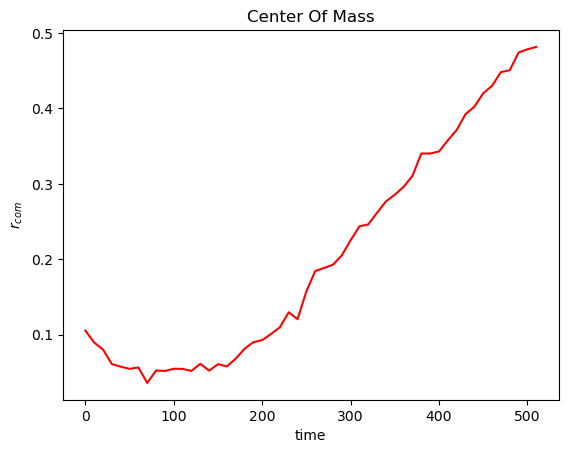

In [170]:
if (len(m)==30000):
    m = np.insert(m,0,M_bh)


com_x = np.zeros(len(t_sim))
com_y = np.zeros(len(t_sim))
com_z = np.zeros(len(t_sim))
com_r = np.zeros(len(t_sim))

#initial com
com_mask = r[:,0] < 10*a 
com_x[0] = np.sum(x[com_mask,0]*m[com_mask])/(np.sum(m[com_mask]))
com_y[0] = np.sum(y[com_mask,0]*m[com_mask])/(np.sum(m[com_mask]))
com_z[0] = np.sum(z[com_mask,0]*m[com_mask])/(np.sum(m[com_mask]))

com_r[0] = np.sqrt(com_x[0]**2+com_y[0]**2+com_z[0]**2)

for i in range(1,len(t_sim)):
    
    com_mask_ = r[:,i] < 10*(com_r[i-1]+a)
    
    com_x[i] = np.sum(x[com_mask_,i]*m[com_mask_])/(np.sum(m[com_mask_]))
    com_y[i] = np.sum(y[com_mask_,i]*m[com_mask_])/(np.sum(m[com_mask_]))
    com_z[i] = np.sum(z[com_mask_,i]*m[com_mask_])/(np.sum(m[com_mask_]))

    com_r[i] = np.sqrt(com_x[i]**2+com_y[i]**2+com_z[i]**2)
    
fig = plt.subplots()

plt.plot(t_sim, com_r, c='red')
plt.xlabel('time')
plt.ylabel(r'$r_{com}$')
plt.title('Center Of Mass')

Text(0.5, 1.0, 'Center Of Mass')

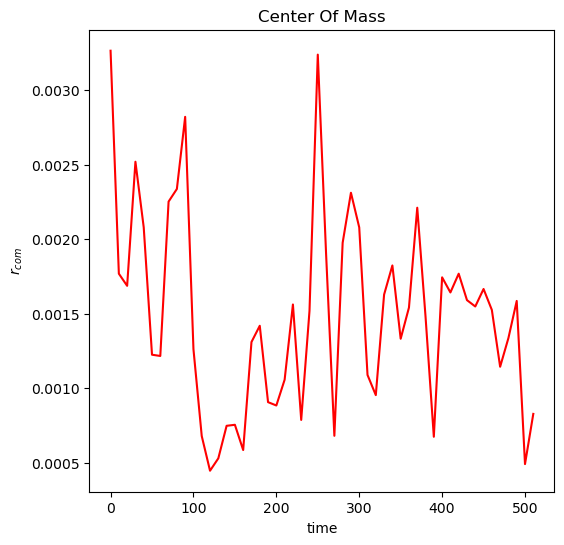

In [171]:
com_vx = np.gradient(com_x)/np.gradient(t_sim)
com_vy = np.gradient(com_y)/np.gradient(t_sim)
com_vz = np.gradient(com_z)/np.gradient(t_sim)

com_vr = np.sqrt(com_vx**2+com_vy**2+com_vz**2)
    
fig = plt.subplots(figsize=(6,6))

plt.plot(t_sim, com_vr, c='red')
plt.xlabel('time')
plt.ylabel(r'$r_{com}$')
plt.title('Center Of Mass')

In [172]:
x_new = x - com_x
y_new = y - com_y
z_new = z - com_z

r_new = np.array([(x_new[i]**2+y_new[i]**2+z_new[i]**2)**0.5 for i in range(N+1)])

In [173]:
v_x_new = v_x - com_vx
v_y_new = v_y - com_vy
v_z_new = v_z - com_vz

v_ini   = np.array([(v_x[i]**2+v_y[i]**2+v_z[i]**2)**0.5 for i in range(N+1)])
v_ini   = v_ini[:,0]
v_r_new = np.array([(v_x_new[i]**2+v_y_new[i]**2+v_z_new[i]**2)**0.5 for i in range(N+1)])
v_r     = v_x**2+v_y**2+v_z**2

[0.1054798  0.043806   0.07327501 0.17850352 0.27567147 0.32769026
 0.33093466 0.33606995 0.30868059 0.30301767 0.3076174  0.35219592
 0.38453634 0.40186726 0.39927579 0.38287638 0.39279798 0.37270276
 0.30989811 0.27584869 0.28698343 0.29288527 0.30336308 0.34096284
 0.38586025 0.37526401 0.38796487 0.39423211 0.35582564 0.30476546
 0.29482723 0.3122157  0.31647887 0.25983884 0.21781249 0.22006773
 0.25722533 0.26752612 0.24367352 0.28307638 0.37786689 0.43444272
 0.43082828 0.32282438 0.18395997 0.04572365 0.00618966 0.04349225
 0.13615141 0.19773792 0.21867417 0.20056747]


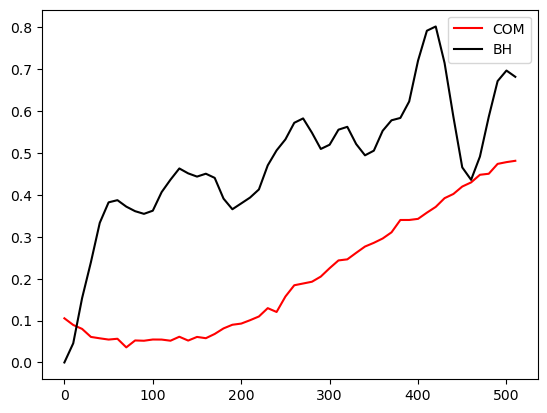

In [174]:
plt.plot(t_sim, com_r, c='red', label='COM')
plt.plot(t_sim, r[0,:], c='black', label='BH')
plt.legend()
print(abs(com_r-r[0,:]))

## <center> Lagrangian radii

6.119461036632576
3.724747499892435
2.357761067507915
1.4720946156998453
0.29236498856034077
-0.6572047854912885


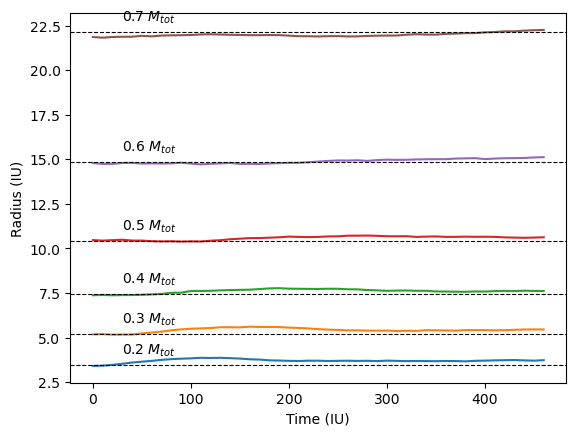

In [82]:
time = t_sim

perc = [0.2,0.3,0.4,0.5,0.6,0.7]

for p in perc:
    r_L = []
    for i in range(len(time)):
        a_    = np.sort(r_new[:,i])
        mask = a_<np.quantile(a_,p)
        r_L.append(np.max(a_[mask]))
        
    a_    = np.sort(r_new[:,0])
    mask = a_<np.quantile(a_,p)
    #lagr = np.max(a[mask])
    lagr = a/(p**(-0.5)-1)
    #Plot it
    r_L = np.array(r_L)
    plt.plot(time,r_L, label=str(p))
    plt.axhline(lagr, color = 'black', ls = '--', lw = .8)#, label='Lagrangian radius at '+str(p))
    plt.text(30, lagr+0.6, str(p)+' $M_{tot}$')
    
    residuals = np.average((r_L - lagr)*100 / lagr)
    print(residuals)


#for i in range(0, N, 100):
#    plt.plot(time,r[i], alpha=0.1)

#plt.ylim(0,50)
plt.xlabel('Time (IU)')
plt.ylabel('Radius (IU)')
#plt.legend()
plt.savefig('Lagrangian_radii_10.png')
plt.show()

## <center> Density profile

In [21]:
def number_particles(r_grid, r_distrib):
    num_part = []
    r_plot =[]
    for i in range(len(r_grid)-1):
        left = r_grid[i]
        right = r_grid[i+1]
        provv = len([el for el in (r_distrib) if (left<el<right)])
        if(provv>1):
            num_part.append(provv)
            r_plot.append(r_grid[i+1])
    return num_part, r_plot

In [22]:
def find_time_idx(t):
    return np.where(abs(t_sim-t)==min(abs(t_sim-t)))[0][0]

In [23]:
def compute_num_density(t,r):
    idx_t = find_time_idx(t)
    r_sort_t = np.sort(r[idx_t,:])
    
    r_grid_t = np.geomspace(min(r_sort_t), max(r_sort_t), 500)
    
    n_part, r_plot_t = number_particles(r_grid_t, r_sort_t)
    delta_V_t = np.array([4*np.pi*r_plot_t[i+1]**3/3 - 4*np.pi*r_plot_t[i]**3/3 for i in range(len(r_plot_t)-1)])
    
    density_t = n_part[1:]/delta_V_t*m[0]
    err_density_t = np.sqrt(delta_V_t)
    
    return density_t, err_density_t, r_plot_t

[]

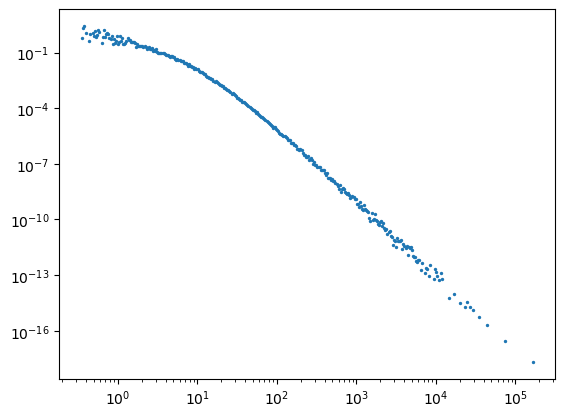

In [24]:
t_3 =26
density_3, err_density_3, r_3 = compute_num_density(t_3,r_new.T[1:,:])

plt.scatter(r_3[1:], density_3, s=2)
plt.loglog()

Velocities in time

/tmp/ipykernel_424/1343927594.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  return - M_g/(r+a) - mu*M_g/r
/tmp/ipykernel_424/1343927594.py:3: RuntimeWarning: divide by zero encountered in true_divide
  return - M_g/(r+a) - mu*M_g/r


0
7
10


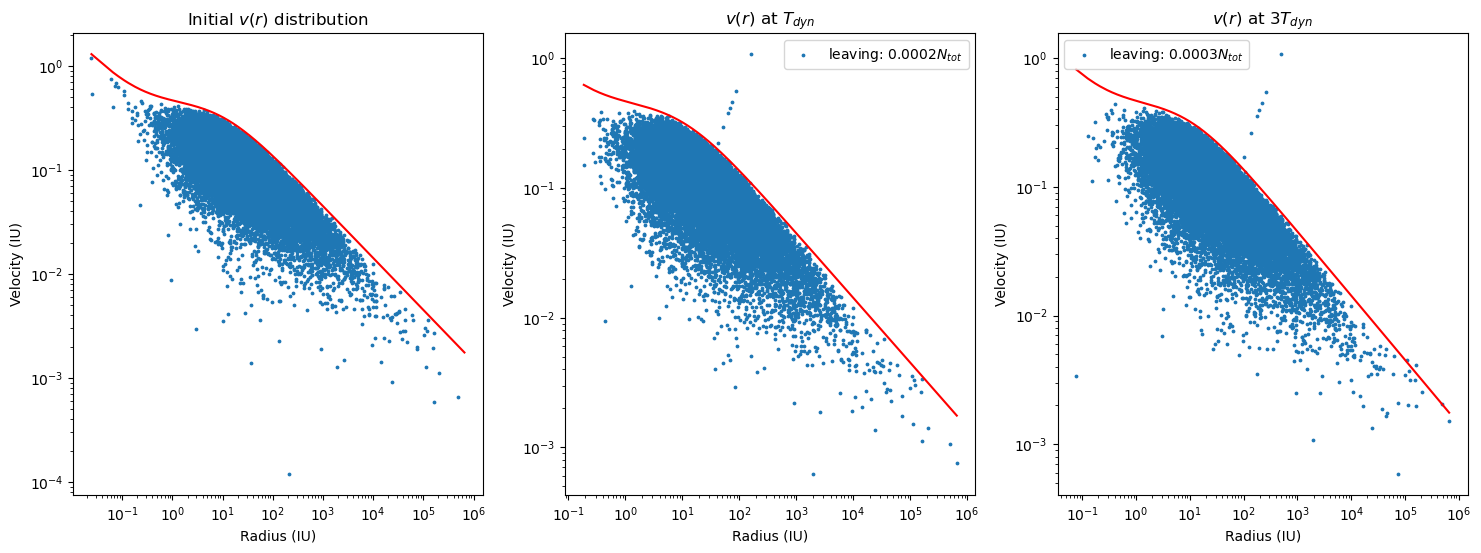

In [175]:
t_0 = 0
v_0 = v_ini

t_2 = T_dyn
v_2 = v_r_new[:,find_time_idx(t_2)]

t_4 = 3*T_dyn
v_4 = v_r_new[:,find_time_idx(t_4)]

# sorting the array
sort_r_0 = np.sort(r[:,find_time_idx(t_0)])
sort_v_0 = v_0[np.argsort((r[:,find_time_idx(t_0)]))]

sort_r_2 = np.sort(r_new[:,find_time_idx(t_2)])
sort_v_2 = v_2[np.argsort((r_new[:,find_time_idx(t_2)]))]

sort_r_4 = np.sort(r_new[:,find_time_idx(t_4)])
sort_v_4 = v_4[np.argsort((r_new[:,find_time_idx(t_4)]))]

# compute the fraction of particles leaving the distribution
n_0 = 0
n_2 = 0
n_4 = 0

for i in range(len(sort_r_0)):
    if(sort_v_0[i]>=np.sqrt(2*abs(Phi(M_g, a, sort_r_0[i], mu)))):
        n_0 += 1

for i in range(len(sort_r_2)):
    if(sort_v_2[i]>=np.sqrt(2*abs(Phi(M_g, a, sort_r_2[i], mu)))):
        n_2 += 1

for i in range(len(sort_r_4)):
    if(sort_v_4[i]>=np.sqrt(2*abs(Phi(M_g, a, sort_r_4[i], mu)))):
        n_4 += 1
        
print(n_0)
print(n_2)
print(n_4)

frac_0 = n_0/N
frac_2 = n_2/N
frac_4 = n_4/N

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(18,6))

ax[0].scatter(sort_r_0, sort_v_0, s=3, label=r'leaving: $%.4f N_{tot}$'%frac_2)
ax[0].plot(sort_r_0, np.sqrt(2*abs(Phi(M_g, a, sort_r_0, mu))), c='red')
ax[0].loglog()
ax[0].set(xlabel = 'Radius (IU)', ylabel = 'Velocity (IU)', title = 'Initial $v(r)$ distribution')

ax[1].scatter(sort_r_2, sort_v_2, s=3, label=r'leaving: $%.4f N_{tot}$'%frac_2)
ax[1].plot(sort_r_2, np.sqrt(2*abs(Phi(M_g, a, sort_r_2, mu))), c='red')
ax[1].loglog()
ax[1].set(xlabel = 'Radius (IU)', ylabel = 'Velocity (IU)', title = r'$v(r)$ at $T_{dyn}$')
ax[1].legend()

ax[2].scatter(sort_r_4, sort_v_4, s=3, label=r'leaving: $%.4f N_{tot}$'%frac_4)
ax[2].plot(sort_r_4, np.sqrt(2*abs(Phi(M_g, a, sort_r_4, mu))), c= 'red')
ax[2].loglog()
ax[2].set(xlabel = 'Radius (IU)', ylabel = 'Velocity (IU)', title = r'$v(r)$ at $3T_{dyn}$')
ax[2].legend()

plt.savefig('escape_v.png')

# <div style="text-align: center;">Energies and Angular Momentum</div>

In [84]:
##########
#Energies#
##########

en_file_name = "exam_logfile_N30001_a4.txt"
en_data      = pd.read_csv(en_file_name, header=None).to_numpy()

raws_to_keep = [x + 1 for x in range(0,len(en_data)) if "|T+U|" in en_data[x][0]]
lines = np.array(raws_to_keep)

times = []
T = []
U = []

for i in range(0, len(lines)):
        times.append(float(en_data[lines[i]][0][4:12]))
        T.append(float(en_data[lines[i]][0][21:28]))
        U.append(float(en_data[lines[i]][0][29:36]))


en_times = np.array(times)
Kin_en   = np.array(T)
Pot_en   = -np.array(U)

E_vir    = 2*Kin_en + Pot_en

#E_sys = Kin_en + Pot_en

Text(0, 0.5, 'res %')

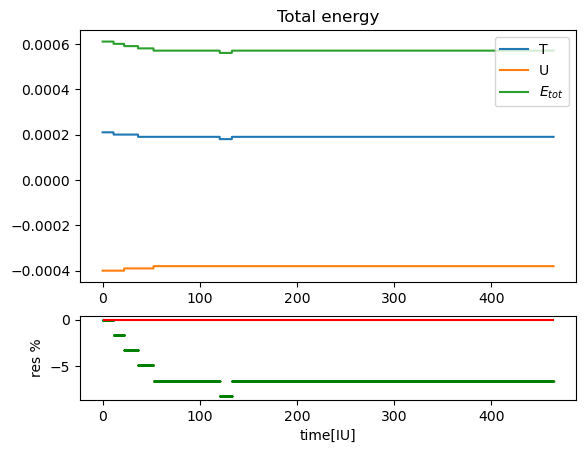

In [85]:
E_sys = Kin_en - Pot_en

fig,ax = plt.subplots(nrows=2,ncols=1,gridspec_kw={'height_ratios': [3, 1]})

ax[0].plot(en_times,Kin_en,label=r'T')
ax[0].plot(en_times,Pot_en,label=r'U')
ax[0].plot(en_times,E_sys,label=r'$E_{tot}$')
ax[0].set_title('Total energy')
ax[0].legend()

res_E = (E_sys[:-1]-E_sys[0])*100/(E_sys[0])
ax[1].scatter(en_times[:-1],res_E,color='green',s=0.1)
ax[1].hlines(0,min(en_times[:-1]),max(en_times[:-1]),color='red')
ax[1].set_xlabel('time[IU]')
ax[1].set_ylabel('res %')

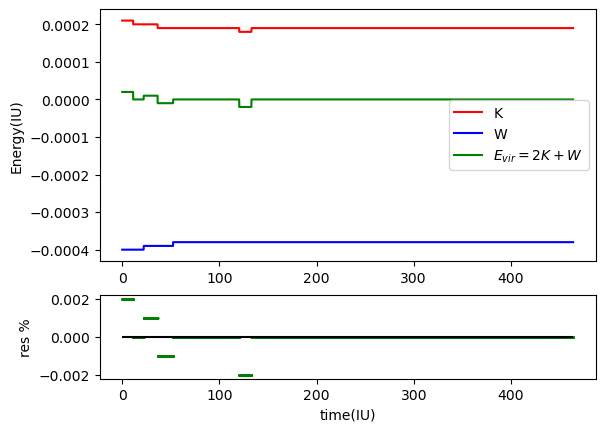

In [86]:
fig,ax = plt.subplots(nrows=2,ncols=1,gridspec_kw={'height_ratios': [3, 1]})

ax[0].plot(en_times,Kin_en,label=r'K', color='red')
ax[0].plot(en_times,Pot_en,label=r'W', color='blue')
ax[0].plot(en_times,E_vir,label=r'$E_{vir} = 2K + W$', color='green')
ax[0].set(ylabel='Energy(IU)')
ax[0].legend()


res_E = (E_vir[:-1]-0)*100
ax[1].scatter(en_times[:-1],res_E,color='green',s=0.5)
ax[1].hlines(0,min(en_times[:-1]),max(en_times[:-1]),color='black')
ax[1].set_xlabel('time(IU)')
ax[1].set_ylabel('res %')
plt.savefig('virial_theorem.png')

In [87]:
##################
#Angular momentum#
##################

time = t_sim

# Build the position and velocity vectors 

pos_vector = np.array([x_new,y_new,z_new]).T
vel_vector = np.array([v_x_new,v_y_new,v_z_new]).T

# Angular momentum
L = np.empty([len(time), N+1, 3])
print(L.shape)


for i in tqdm(range(len(time))):
    for j in range(N+1):
        L[i,j] = m[j]*np.cross(pos_vector[i,j],vel_vector[i,j])
        
Lx = np.zeros(len(time))
Ly = np.zeros(len(time))
Lz = np.zeros(len(time))

for i in range(len(time)-1):
    Lx[i] = np.sum(L[i,:,0])
    Ly[i] = np.sum(L[i,:,1])
    Lz[i] = np.sum(L[i,:,2])
    
L_tot = np.sqrt(Lx**2+Ly**2+Lz**2)


(47, 30001, 3)


100%|███████████████████████████████████████████████████████████████████████████████████| 47/47 [00:33<00:00,  1.42it/s]


Text(0, 0.5, 'res %')

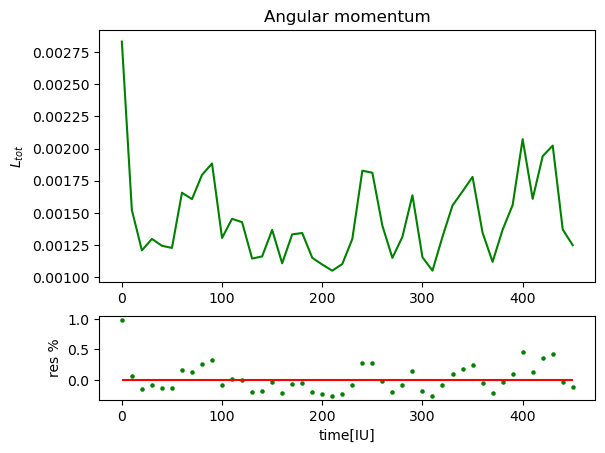

In [88]:
fig,ax = plt.subplots(nrows=2,ncols=1,gridspec_kw={'height_ratios': [3, 1]})

ax[0].plot(t_sim[:-1],L_tot[:-1],color='green')
#ax[0].set_xlabel('time [IU]')
ax[0].set_ylabel(r'$L_{tot}$')
ax[0].set_title('Angular momentum')

res_L = (L_tot[:-1]-np.mean(L_tot))/(np.mean(L_tot))
ax[1].scatter(t_sim[:-1],res_L,color='green',s=5)
ax[1].hlines(0,min(t_sim[:-1]),max(t_sim[:-1]),color='red')
ax[1].set_xlabel('time[IU]')
ax[1].set_ylabel('res %')

## <center> Animation

  0%|          | 0/47 [00:00<?, ?it/s]

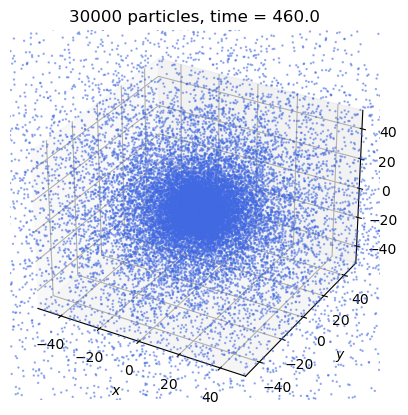

In [136]:
from matplotlib import animation
from tqdm.notebook import tqdm

def update(num):
    global N    #N_particles
    l = 50
    ax.clear()
    

    ax.scatter(x[1:,num-1], y[1:,num-1], z[1:,num-1], color = 'royalblue', s = .5 ,alpha = 0.5)        # Updating Point Location
    ax.scatter(x[0,num-1], y[0,num-1], z[0,num-1], color = 'red',zorder=100, s = 2.5 ,alpha = 0.5)
    
    ax.set_title(f'{N} particles, time = {round(time[num],1)}')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_zlabel(r'$z$')
    
    ax.set_xlim(-l, l)
    ax.set_ylim(-l, l)
    ax.set_zlim(-l, l)
    

# Plotting the Animation
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set(aspect='equal')
line_ani = animation.FuncAnimation(fig, update, interval=1,   
                                   frames=tqdm(range(len(time))))

# Saving the Animation
f = r"exam_bh_13.gif"
writergif = animation.PillowWriter(fps=30)
line_ani.save(f, writer=writergif, dpi=150)

plt.show()

### <center> Old things I'm too afraid to delete

In [ ]:
'''
N_steps = 10**4
radius  = np.geomspace(min(r),max(r),N_steps)

psi = np.sort(-Phi(M_g, a, radius, mu))
rho = np.sort(density_H(M_g, a, radius))

epsilon = np.geomspace(min(psi),max(psi),N_steps)  # define the array of extremes of integration
#epsilon = np.linspace(0,max(psi),N_steps)


# numerical integral
integral = np.zeros(N_steps)

for i in range(N_steps):
    
    N_points = len(psi[psi<epsilon[i]]) # compute the number of points within eps_i
    
    if(N_points==0):
        N_points = 1 # to avoid division by 0
       
    dpsi = epsilon[i]/N_points  # determine the dpsi
    
    for j in range(N_points-1):
        drho_dpsi = (rho[j+1] - rho[j]) / (psi[j+1] - psi[j])  # compute the numerical derivative
        #drho_dpsi = np.diff(rho)[j] / np.diff(psi)[j] #same as above, but it takes more time
        integral[i] += drho_dpsi* dpsi /(np.sqrt(epsilon[i] - dpsi*(j+1)))    # sum all the dpsi
'''
        

In [ ]:
'''
def f_evaluated_eps (eps_test, eps_integral):
    index = np.where(abs(eps_integral[1:]-eps_test) == min(abs(eps_integral[1:]-eps_test)))[0][0] # find the closest index
    
    if((eps_integral[index]-eps_test)<0):
        index -= 1  # to have always the same approx as f(index) as upper limit
    
    # expand to the first order the function for a better approximation:
    order1_coeff = (f_eps[index+1]-f_eps[index])/(eps_integral[index+1]-eps_integral[index])
    
    return f_eps[index] + order1_coeff * (eps_test-eps_integral[index])

    
velocity = np.empty(N)

N_steps_1 = 100

for j in tqdm(range(N)):

    integral_F = np.zeros(N_steps_1)
    psii       = -Phi (M_g, a, r[j], mu)
    eps        = np.geomspace(min(psi),psii,N_steps_1)
    #eps       = np.linspace(0,psii,N_steps_1)
    deps       = psii / N_steps_1
    for i in range(N_steps_1):
        for k in range(i):
            f_k = f_evaluated_eps(eps[k],eps_integral)
            integral_F[i] += 4*np.pi*deps*np.sqrt(2*(psii-eps[k]))*f_k


    integral_F /= max(integral_F)
    F_guess = np.random.uniform(0,1)

    eps_try = eps[np.abs(integral_F - F_guess) == min(np.abs(integral_F - F_guess))]

    velocity[j] = np.sqrt(2*(psii - eps_try))'''

In [24]:
'''
def f_evaluated_eps (eps_test, eps_integral, f_eps):
    index = np.where(abs(eps_integral-eps_test) == min(abs(eps_integral-eps_test)))[0][0] # find the closest index
    
    if((eps_integral[index]-eps_test)<0):
        index -= 1  # to have always the same approx as f(index) as upper limit
    
    if(index==len(f_eps)-1):
        index -= 1  # to have always the same approx as f(index) as upper limit
    
    # expand to the first order the function for a better approximation:
    order1_coeff = (f_eps[index+1]-f_eps[index])/(eps_integral[index+1]-eps_integral[index])
    
    return f_eps[index] + order1_coeff * (eps_test-eps_integral[index])

    
velocity = np.empty(N)

N_steps_1 = 100

psi_F = - Phi(M_g, a, r_sort, mu)

for j in tqdm(range(N)):

    epsilon_F = np.linspace(0,psi_F[j], N_steps_1)
    deps = psi_F[j] / N_steps_1
    
    integral_F = np.empty(N_steps_1)
    
    for i in range(N_steps_1):
        for k in range(i):
            f_eps_F  = f_evaluated_eps(epsilon_F[k], eps_integral, f_eps)
            integral_F[i] += 4*np.pi*deps*np.sqrt(2*(psi_F[j]-epsilon_F[k]))*f_eps_F
    
    #integral_F[j] = np.trapz(np.sqrt(2*(psi_F[j]-epsilon_F[1:]))*f_eps_F, epsilon_F[1:])
   
    integral_F /= max(integral_F)
    F_guess = np.random.uniform(0,1)

    eps_try = epsilon_F[np.abs(integral_F - F_guess) == min(np.abs(integral_F - F_guess))]

    velocity[j] = np.sqrt(2*(psi_F[j] - eps_try)) 

'''

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [5:13:51<00:00,  1.88s/it]


In [ ]:
##########
#Energies#
##########
'''
en_file_name = "logfile.txt"
en_data      = pd.read_csv(en_file_name, header=None).to_numpy()

raws_to_keep = [x + 1 for x in range(0,len(en_data)) if "|T+U|" in en_data[x][0]]
lines = np.array(raws_to_keep)

times = []
T = []
U = []

for i in range(0, len(lines)):
        times.append(float(en_data[lines[i]][0][4:12]))
        T.append(float(en_data[lines[i]][0][21:28]))
        U.append(float(en_data[lines[i]][0][29:36]))


en_times = np.array(times)
Kin_en   = np.array(T)
Pot_en   = np.array(U)

E_tot    = Kin_en - Pot_en

'''

In [ ]:
##################
#Angular momentum#
##################
'''
# Build the position and velocity vectors 

pos_vector = np.array([x,y,z]).T
vel_vector = np.array([v_x,v_y,v_z]).T

# Angular momentum
L = np.empty([len(time), N+1, 3])
print(L.shape)
m = np.insert(m,0,M_bh)


for i in tqdm(range(len(time))):
    for j in range(N+1):
        L[i,j] = m[j]*np.cross(pos_vector[i,j],vel_vector[i,j])
        
Lx = np.zeros(len(time))
Ly = np.zeros(len(time))
Lz = np.zeros(len(time))

for i in range(len(time)-1):
    Lx[i] = np.sum(L[i,:,0])
    Ly[i] = np.sum(L[i,:,1])
    Lz[i] = np.sum(L[i,:,2])
    
L_tot = np.sqrt(Lx**2+Ly**2+Lz**2)

'''